In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from collections import Counter
# import spacy
# nlp = spacy.load('en_core_web_sm')

# from spacy.lang.en import English
# tokenizer = English().Defaults.create_tokenizer(nlp)


# def my_spacy_tokenizer(doc):
#     # TODO: need to add a phase to break -- offsets and strip white space.
#     tokens = tokenizer(doc)
#     return([token.text for token in tokens])


# Dataset statistics on distribution of idf & vocab relative to number examples

Datasets have fairly similar vocab size to number of example utterances ratios, but crisischats' is roughly double, indicating a large vocab relative to dataset size. 

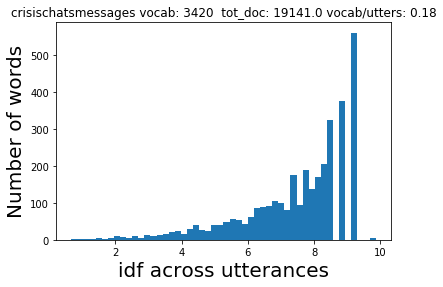

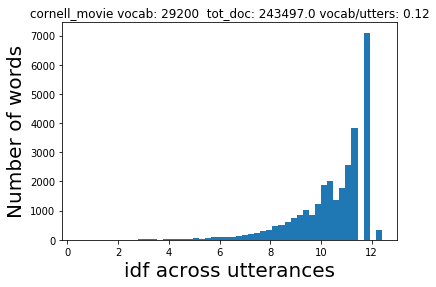

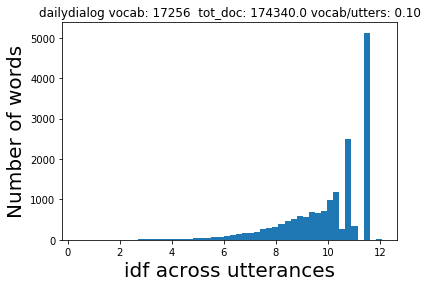

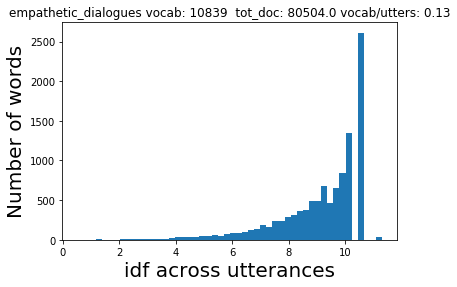

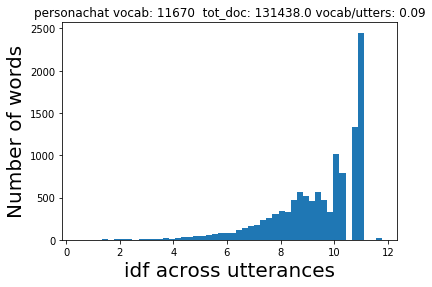

In [130]:
tasks = ['crisischatsmessages', 'cornell_movie', 'dailydialog', 'empathetic_dialogues', 'personachat']
for task in tasks:
    
    tot_doc = open('/data/odemasi/packages/ParlAI/tmp/%s/dict_minfreq_2.tot_doc' % task, 'r').readline()
    tot_doc = float(tot_doc.strip('\n'))
    lines = open('/data/odemasi/packages/ParlAI/tmp/%s/dict_minfreq_2.doc_freq' % task, 'r').readlines()
    doc_freq = [float(x.split('\t')[1].strip('\n')) for x in lines[4:]] # strip off special tokens at front
    
    plt.hist([np.log(tot_doc/x) for x in doc_freq], bins=50)
    plt.title('%s vocab: %s  tot_doc: %s vocab/utters: %.2f' % (task, len(doc_freq), tot_doc, len(doc_freq)/float(tot_doc)))
#     plt.xlim([-1, 11])
    plt.xlabel('idf across utterances', fontsize=20)
    plt.ylabel('Number of words', fontsize=20)
    plt.show()

# Load data

In [22]:
batch_name = 'batches/Batch_3622867_batch_results.csv'

raw_df = pd.read_csv(batch_name)
turk_df = raw_df

In [5]:
raw_df[:3]

,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,Answer.rel_3,Answer.rel_4,Answer.rel_5,Answer.rel_6,Answer.rel_7,Answer.rel_8,Answer.rel_9,Answer.rel_warmup,Approve,Reject
0,3UUSLRKAUMNRYILUD069OZX66TLD7T,33V96X0SXRP0GOK7AUJDZXHJQE1Z1Y,"Select the most interesting, relevant, and ove...",Select the most interesting and relevance dial...,"labeling, dialogue",$1.00,Sat Apr 27 10:21:01 PDT 2019,3,BatchId:3622867;OriginalHitTemplateId:928390912;,3600,...,1,1,1,1,1,1,1,1,NaN,NaN
1,3UUSLRKAUMNRYILUD069OZX66TLD7T,33V96X0SXRP0GOK7AUJDZXHJQE1Z1Y,"Select the most interesting, relevant, and ove...",Select the most interesting and relevance dial...,"labeling, dialogue",$1.00,Sat Apr 27 10:21:01 PDT 2019,3,BatchId:3622867;OriginalHitTemplateId:928390912;,3600,...,3,1,1,2,1,2,3,1,NaN,NaN
2,3UUSLRKAUMNRYILUD069OZX66TLD7T,33V96X0SXRP0GOK7AUJDZXHJQE1Z1Y,"Select the most interesting, relevant, and ove...",Select the most interesting and relevance dial...,"labeling, dialogue",$1.00,Sat Apr 27 10:21:01 PDT 2019,3,BatchId:3622867;OriginalHitTemplateId:928390912;,3600,...,3,1,1,2,3,1,2,1,NaN,NaN


In [7]:
list(raw_df.columns)

['HITId',
 'HITTypeId',
 'Title',
 'Description',
 'Keywords',
 'Reward',
 'CreationTime',
 'MaxAssignments',
 'RequesterAnnotation',
 'AssignmentDurationInSeconds',
 'AutoApprovalDelayInSeconds',
 'Expiration',
 'NumberOfSimilarHITs',
 'LifetimeInSeconds',
 'AssignmentId',
 'WorkerId',
 'AssignmentStatus',
 'AcceptTime',
 'SubmitTime',
 'AutoApprovalTime',
 'ApprovalTime',
 'RejectionTime',
 'RequesterFeedback',
 'WorkTimeInSeconds',
 'LifetimeApprovalRate',
 'Last30DaysApprovalRate',
 'Last7DaysApprovalRate',
 'Input.msg1_0',
 'Input.msg2_0',
 'Input.resp_1_0',
 'Input.model_1_0',
 'Input.resp_2_0',
 'Input.model_2_0',
 'Input.resp_3_0',
 'Input.model_3_0',
 'Input.msg1_1',
 'Input.msg2_1',
 'Input.resp_1_1',
 'Input.model_1_1',
 'Input.resp_2_1',
 'Input.model_2_1',
 'Input.resp_3_1',
 'Input.model_3_1',
 'Input.msg1_2',
 'Input.msg2_2',
 'Input.resp_1_2',
 'Input.model_1_2',
 'Input.resp_2_2',
 'Input.model_2_2',
 'Input.resp_3_2',
 'Input.model_3_2',
 'Input.msg1_3',
 'Input.msg2_

In [8]:
raw_df.loc[0,'Input.model_3_0']

'empathetic_dialogues seq2seq idf'

## check warmup question

In [14]:
raw_df['Answer.rank_0_3'][:3]

0    3
1    2
2    2
Name: Answer.rank_0_3, dtype: int64

## Look at justifications

In [20]:
# [type(x) == str for x in raw_df['Answer.check_int_9']]

In [12]:
raw_df[['Answer.check_int_9',
'Answer.check_int_warmup',
'Answer.check_rel_0',
'Answer.int_0',
'Answer.rank_0_1', # example_option
'Answer.rel_0']].loc[0]

Answer.check_int_9         NaN
Answer.check_int_warmup    NaN
Answer.check_rel_0         NaN
Answer.int_0                 2
Answer.rank_0_1              1
Answer.rel_0                 1
Name: 0, dtype: object

# Parse data into convenient data frame

In [27]:

model_order = ['s2s', 'transformer', 'lm']
method_order = ['vanilla', 'idf', 'swapping']
choice_df = []
# grammar_df = []
for i in turk_df.index:
    row = turk_df.loc[i]
    hit_num = i
    worker_id = row['WorkerId']
    for ex in range(10): # given to each turker in a single HIT
        
        option_to_method = {}
        method_to_rank = {}
#         method_to_resp = {}
#         method_to_gram = {}
        for option in range(1, 4):
            model_pieces = row['Input.model_%s_%s' % (option, ex)].split(' ')
            if len(model_pieces) == 2: 
                dataset, second = model_pieces
                if second not in ['s2s', 'transformer']:
                    method = second
                    model = 's2s' 
                else: 
                    method = 'vanilla'
                    model = second
            else: 
                dataset, model, method = model_pieces
                
            option_to_method[option] = method
            method_to_rank[method] = row['Answer.rank_%s_%s' % (ex, option)]
            
#             method_to_resp[method] = row['Input.resp_%s_%s' % (option, ex)]
#             method_to_gram[method] = np.isnan(row['Answer.gram_%s_%s' % (ex, option)])
            
        most_interesting = option_to_method[row['Answer.int_%s' % (ex,)]]
        most_relevant = option_to_method[row['Answer.rel_%s' % (ex,)]]
        none_int = type(row['Answer.check_int_%s'% (ex,)]) == str
        none_rel = type(row['Answer.check_rel_%s'% (ex,)]) == str
        message1 = row['Input.msg1_%s' % (ex,)]
        message2 = row['Input.msg2_%s' % (ex,)]
        
        
        choice_df.append([hit_num, worker_id, dataset, model, most_interesting, most_relevant, \
                          message1, message2, none_int, none_rel] + \
                         [method_to_rank[m] for m in method_order] )

choice_df = pd.DataFrame(choice_df, columns = ['hit_num', 'worker_id', 'dataset', 'model', \
                                               'most_int', 'most_rel', \
                                               'message1', 'message2', \
                                               'none_int', 'none_rel']\
                                             + method_order)

choice_df['context'] = choice_df['message1'] + choice_df['message2']


In [28]:
choice_df[:3]

,hit_num,worker_id,dataset,model,most_int,most_rel,message1,message2,none_int,none_rel,vanilla,idf,swapping,context
0,0,A1PUHCEBSOWETV,empathetic_dialogues,seq2seq,vanilla,swapping,~~,i did something really foolish at the grocery ...,False,False,2,3,1,~~i did something really foolish at the grocer...
1,0,A1PUHCEBSOWETV,cornell_movie,seq2seq,idf,vanilla,do you have a baby?,no... the closest...,False,False,1,2,3,do you have a baby?no... the closest...
2,0,A1PUHCEBSOWETV,personachat,transformer,idf,vanilla,what can i say ? i am amazing lol,its almost as cool as lord of the rings . have...,False,False,1,2,3,what can i say ? i am amazing lolits almost as...


In [75]:
print('Most interesting: ', Counter(choice_df['most_int']))
print('Most relevant: ', Counter(choice_df['most_rel']))
print('Percent of examples where int==rel: %.2f%%' % (100.0*np.sum(choice_df['most_int'] == choice_df['most_rel']) \
                                  / float(choice_df['most_rel'].shape[0]),))

print('Fraction of examples where none interesting: %.2f' % choice_df['none_int'].mean())
print('Fraction of examples where none relevant: %.2f' % choice_df['none_rel'].mean())

Most interesting:  Counter({'idf': 849, 'swapping': 847, 'vanilla': 704})
Most relevant:  Counter({'vanilla': 961, 'swapping': 756, 'idf': 683})
Percent of examples where int==rel: 24.58%
Fraction of examples where none interesting: 0.14
Fraction of examples where none relevant: 0.08


# Consider times model gets a rank (consider all input individually)
If a method gets a majority of rank 1 votes (for best message overall), it's usually vanilla. Idf and swapping split places 2 and 3

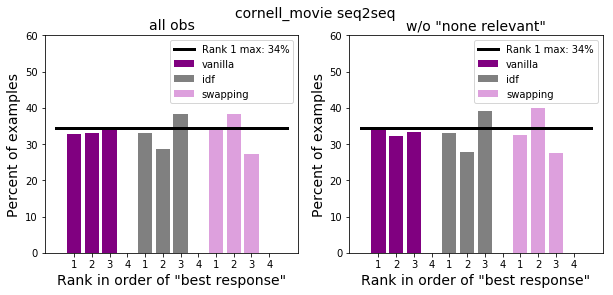

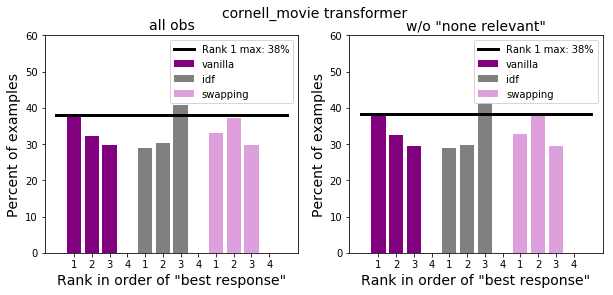

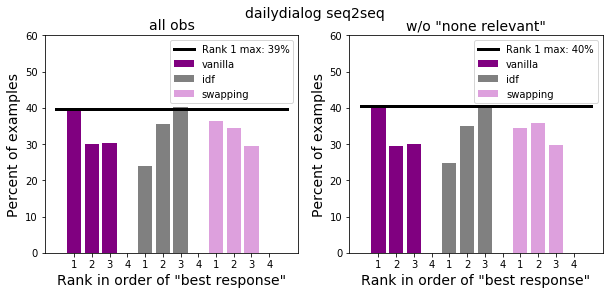

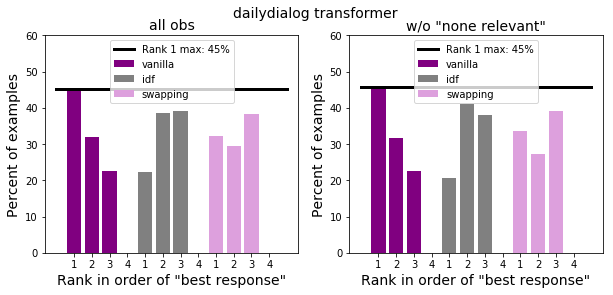

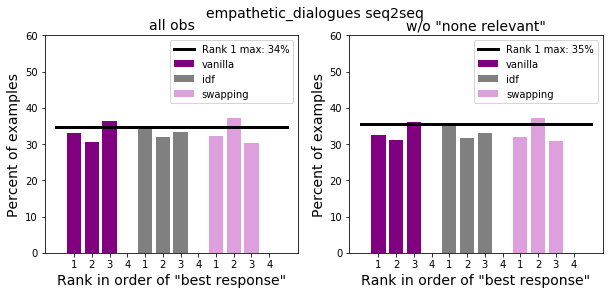

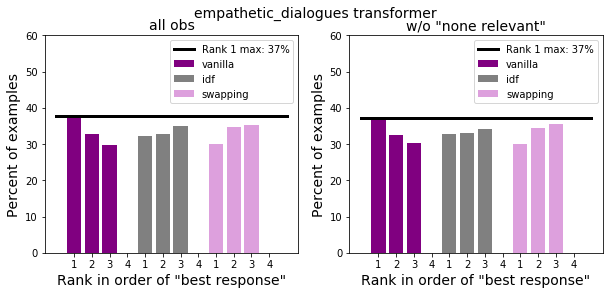

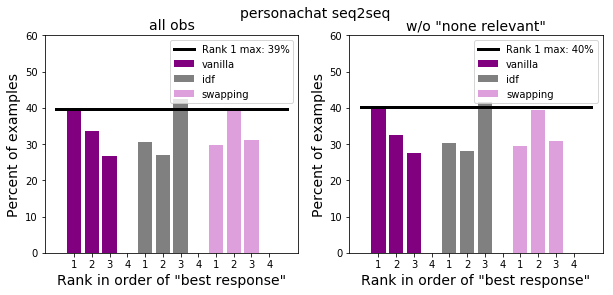

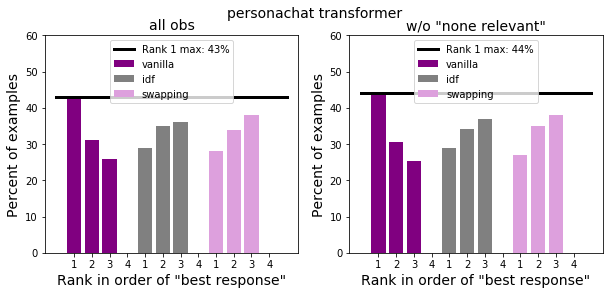

In [141]:
for (dataset, model), setting_df in choice_df.groupby(['dataset', 'model']):
    
    some_relevant = ~setting_df['none_rel']
    
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    for name, df in [('all obs', setting_df), 
                    ('w/o "none relevant"', setting_df[some_relevant])]:

        colors = ['purple', 'grey', 'plum']
        N = float(df.shape[0])
        
        if name == 'all obs':
            use_ax = ax[0]
        else: 
            use_ax = ax[1]
            
        method_max = 0
        for m, method in enumerate(method_order):
            
            for r in range(3):
                perc_rank = 100.*np.sum(df[method] == (r+1))/N

                if r == 0:
                    method_max = np.max((method_max, perc_rank))
                    use_ax.bar(m*4+r, perc_rank, color=colors[m], label=method)
                else:
                    use_ax.bar(m*4+r, perc_rank, color=colors[m])
        
        use_ax.set_xticks(np.arange(12))
        use_ax.set_xticklabels(1+np.mod(np.arange(12),4))
        use_ax.plot([-1,12], [method_max, method_max],'k', linewidth=3, label='Rank 1 max: %d%%'%method_max)
        use_ax.legend()
        use_ax.set_ylim([0, 60])
        use_ax.set_title(name, fontsize=14)
        use_ax.set_ylabel('Percent of examples', fontsize=14)
        use_ax.set_xlabel('Rank in order of "best response"', fontsize=14)
    
    plt.suptitle('%s %s' % (dataset, model), fontsize=14)
    plt.show()
        

In [79]:
choice_df[:1]

,hit_num,worker_id,dataset,model,most_int,most_rel,message1,message2,none_int,none_rel,vanilla,idf,swapping,context
0,0,A1PUHCEBSOWETV,empathetic_dialogues,seq2seq,vanilla,swapping,~~,i did something really foolish at the grocery ...,False,False,2,3,1,~~i did something really foolish at the grocer...


# Worker agreement
There is considerable disagreement amoung workers, but it varies between datasets. 

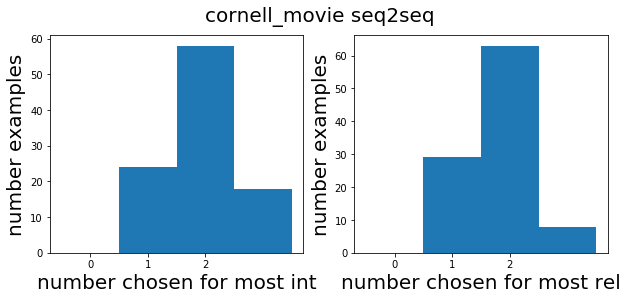

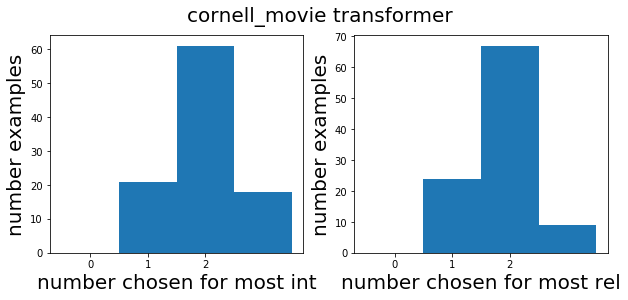

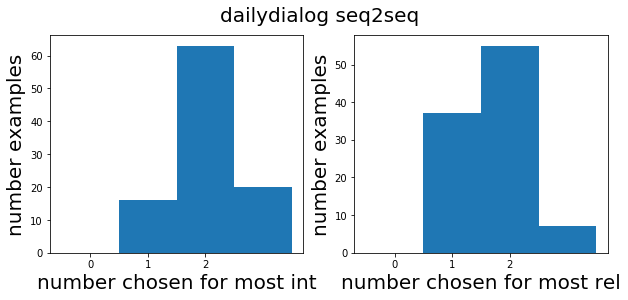

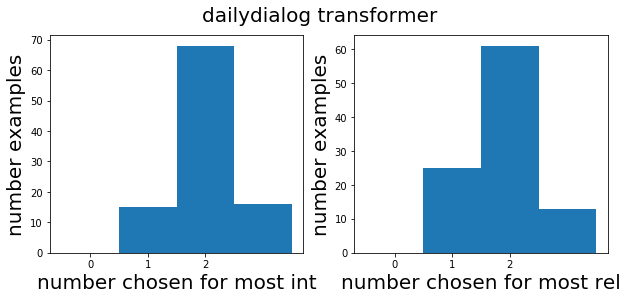

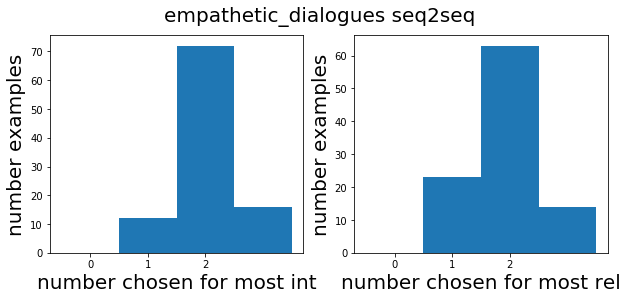

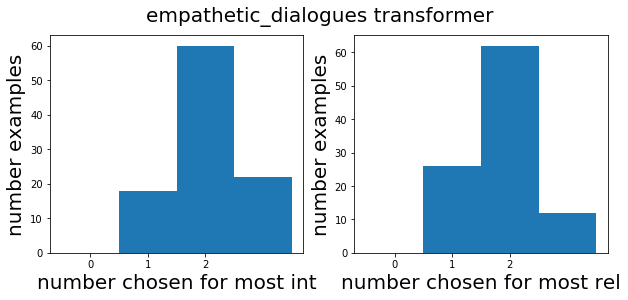

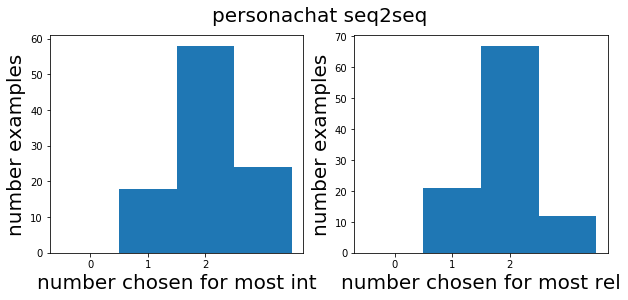

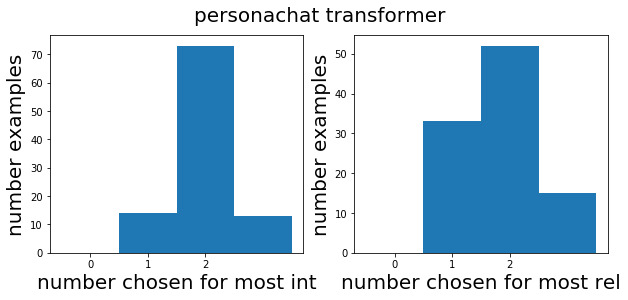

In [142]:
for (dataset, model), setting_df in choice_df.groupby(['dataset', 'model']):
    
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    
    num_most_int = []
    num_most_rel = []
    for context, df in setting_df.groupby('context'):
        num_most_int.append(len(df['most_int'].unique()))
        num_most_rel.append(len(df['most_rel'].unique()))

    ax[0].hist(num_most_int, bins=np.arange(5)-.5)
    ax[0].set_xticks(np.arange(3))
    ax[0].set_xlabel('number chosen for most int', fontsize=20)
    ax[0].set_ylabel('number examples', fontsize=20)
#     ax[0].set_title('%s %s' % (dataset, model), fontsize=20)
#     plt.show()

    ax[1].hist(num_most_rel, bins=np.arange(5)-.5)
    ax[1].set_xlabel('number chosen for most rel', fontsize=20)
    ax[1].set_ylabel('number examples', fontsize=20)
#     ax[1].set_title('%s %s' % (dataset, model), fontsize=20)
    ax[1].set_xticks(np.arange(3))
    plt.suptitle('%s %s' % (dataset, model), fontsize=20)
    plt.show()

# Relationship of when interested and when relevant
There is little consistent relationship across datasets/models, but all have the most interesting match the most relevant < 25% of the time.

cornell_movie seq2seq


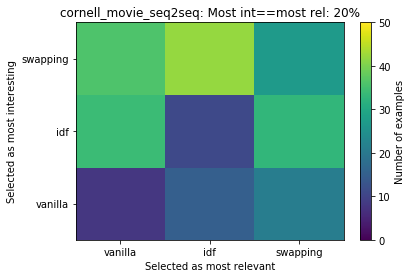

cornell_movie transformer


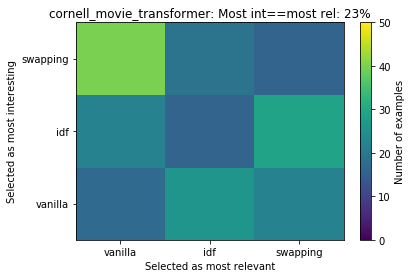

dailydialog seq2seq


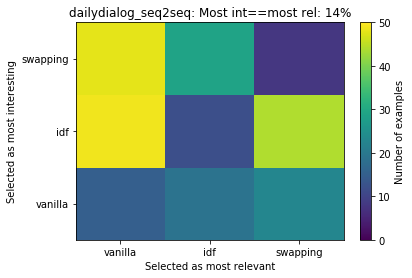

dailydialog transformer


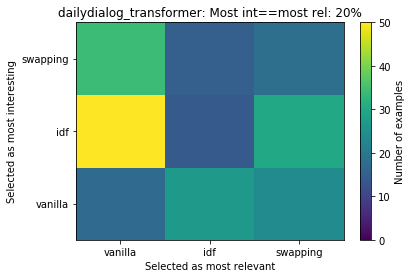

empathetic_dialogues seq2seq


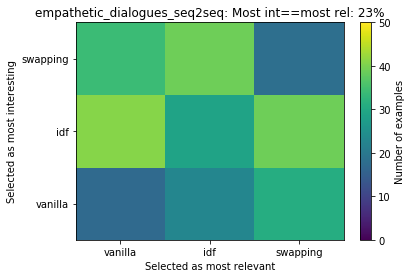

empathetic_dialogues transformer


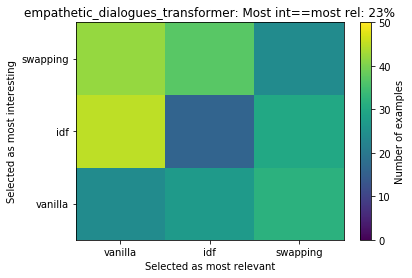

personachat seq2seq


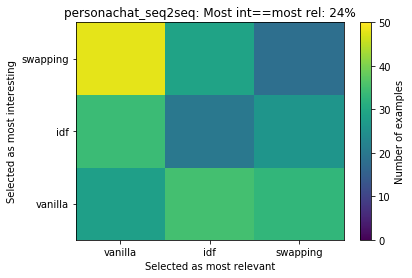

personachat transformer


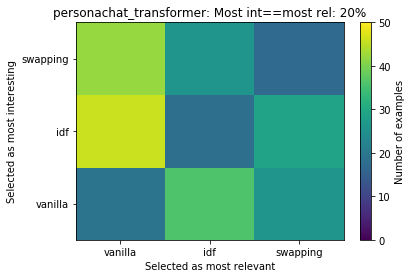

In [145]:
for (dataset, model), setting_df in choice_df.groupby(['dataset', 'model']):
    
    some_int_relevant = (~setting_df['none_rel']) & (~setting_df['none_int'])
    df = setting_df[some_int_relevant]
    
    
    print(dataset, model)
    print('=========')
    data_model_key = '%s_%s' % (dataset, model)
    
    cross_mat = np.NaN * np.zeros((len(method_order), len(method_order)))
    for i, m1 in enumerate(method_order):
        for j, m2 in enumerate(method_order):
            cross_mat[i,j] = np.sum((df['most_int'] == m1) & (df['most_rel'] == m2))
            
    plt.pcolor(cross_mat, vmin=0, vmax=50)
    plt.xticks(.5 + np.arange(len(method_order)), method_order)
    plt.yticks(.5 + np.arange(len(method_order)), method_order)
    plt.xlabel('Selected as most relevant')
    plt.ylabel('Selected as most interesting')
    plt.colorbar(label='Number of examples')
    ind = np.arange(len(method_order))
    plt.title('%s: Most int==most rel: %d%%' % (data_model_key, 100.0*np.sum(cross_mat[ind,ind])/np.sum(cross_mat)))
    plt.show()

# Considering only examples that get a majority of "best" rank

If we only consider examples where an method is ranked # 1 best overall, we see vanilla win and unclear difference between idf and swapping. 

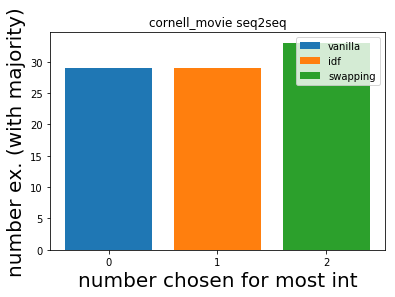

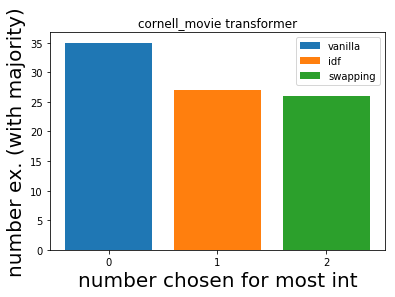

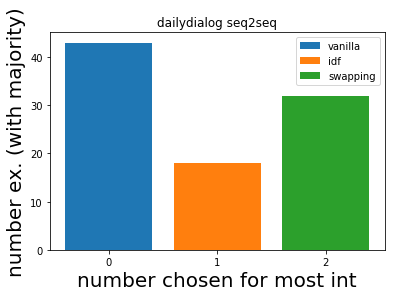

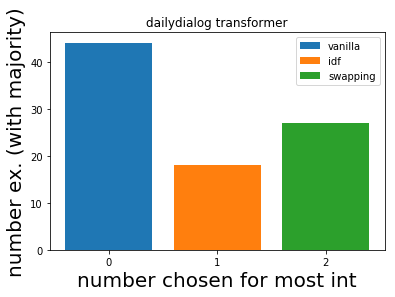

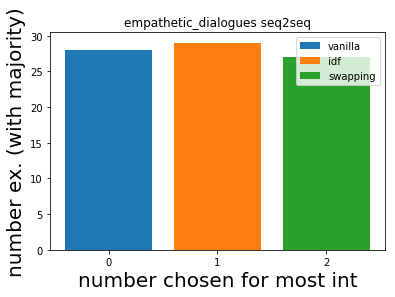

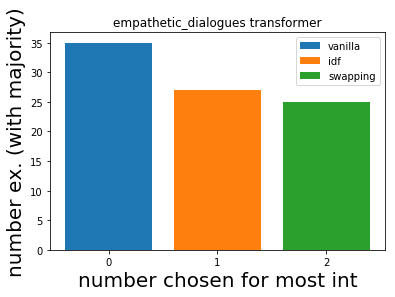

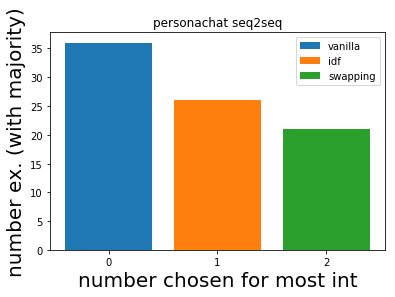

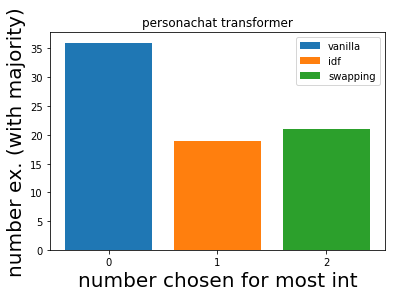

In [184]:
for (dataset, model), setting_df in choice_df.groupby(['dataset', 'model']):
    
    best_choice = []
    for context, df in setting_df.groupby('context'):
        
        rank_votes = (df[['vanilla', 'idf', 'swapping']] == 1).sum()
        if rank_votes.max() >= 2:
            best_choice.append(rank_votes[rank_votes == rank_votes.max()].index[0])
            
    c = Counter(best_choice)
    for i in range(len(method_order)):
        plt.bar(i, c[method_order[i]], label=method_order[i])
        
    plt.xticks(np.arange(3))
    plt.legend(loc='best')
    plt.xlabel('number chosen for most int', fontsize=20)
    plt.ylabel('number ex. (with majority)', fontsize=20)
    plt.title('%s %s' % (dataset, model))
    plt.show()
    